# Module 2 Functional API

## Functional API implementation of Linear Regression

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

x_train = np.linspace(1,10,10)
y_train = 2*x_train + 5*np.random.random(len(x_train))

In [0]:
inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
model = Model(inputs, output)

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd', loss='mse')

In [0]:
model.fit(x_train, y_train, epochs=10, verbose=0)

In [0]:

x_test = np.array([3,5])

In [0]:
yhat = model.predict(x_train)

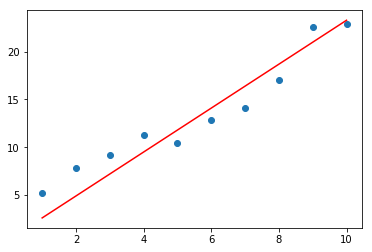

In [0]:
import matplotlib.pyplot as plt

plt.plot(x_train,y_train,'o')
plt.plot(x_train,yhat,'r')
plt.show()

## Import MNIST data

In [0]:
import keras
from keras.datasets import mnist

# Step 1:Load the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test,10)

## Sequental Model for Feedforward NN

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64,input_dim=784,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,batch_size=100)

loss,accuracy = model.evaluate(X_test,y_test)
print("Accuracy ",accuracy)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/2
60000/60000 [==============================] - 3s 50us/step - loss: 0.3628 - acc: 0.8967
Epoch 2/2
10000/10000 [==============================] - 0s 29us/step
Accuracy  0.9618


## Ex: Functional API on Feedforward NN

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

inputs = Input(shape=(784,))
hidden1 = Dense(64,activation='relu')(inputs)
hidden2 = Dense(64,activation='relu')(hidden1)
output = Dense(10,activation='softmax')(hidden2)
model = Model(inputs, output)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,batch_size=100)

loss,accuracy = model.evaluate(X_test,y_test)
print("Accuracy ",accuracy)

Epoch 1/2
60000/60000 [==============================] - 3s 46us/step - loss: 0.3612 - acc: 0.8964
Epoch 2/2
10000/10000 [==============================] - 0s 32us/step
Accuracy  0.9568


## Import MNIST data

In [0]:
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Sequental Model for CNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,batch_size=100)

loss,accuracy = model.evaluate(X_test,y_test)
print("Accuracy ",accuracy)


Epoch 1/2
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1609 - acc: 0.9517
Epoch 2/2
10000/10000 [==============================] - 5s 479us/step
Accuracy  0.9876


## Ex: Functional API on CNN

In [0]:
from keras.layers import Input, Dense, Conv2D,MaxPooling2D,Flatten
from keras.models import Model


inputs = Input((28,28,1))
conv1 = Conv2D(32,(3,3),activation='relu',padding='same')(inputs)
conv1 = MaxPooling2D((2,2))(conv1)
conv2 = Conv2D(32,(3,3),activation='relu',padding='same')(conv1)
conv2 = MaxPooling2D((2,2))(conv2)
conv2 = Flatten()(conv2)
dense1 = Dense(256,activation='relu')(conv2)
output = Dense(10,activation='softmax')(dense1)
model = Model(inputs,output)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,batch_size=100)

loss,accuracy = model.evaluate(X_test,y_test)
print("Accuracy ",accuracy)

Epoch 1/2
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1885 - acc: 0.9436
Epoch 2/2
10000/10000 [==============================] - 4s 381us/step
Accuracy  0.9851


## Import IMDB data

In [0]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000

# Cut texts after this number of words 
maxlen = 20

# Load the data as lists of integers.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

17465344/17464789 [==============================] - 1s 0us/step


## Sequental Model for RNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM


model = Sequential()
model.add(Embedding(max_features, 50))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

# loss,accuracy = model.evaluate(X_test,y_test)
# print("Accuracy ",accuracy)

## Ex: Functional API on RNN

In [0]:
from keras.models import Model
from keras.layers import Dense, Embedding, LSTM, Input

inputs = Input(shape=(None,), dtype='int32', name='text')
embedding = Embedding(max_features, 50)(inputs)
lstm = LSTM(32)(embedding)
output = Dense(1, activation='sigmoid')(lstm)
model = Model(inputs,output)

In [0]:
model.summary()

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=2,validation_data=(X_test,y_test))

loss,accuracy = model.evaluate(X_test,y_test)
print("Accuracy ",accuracy)

## Application of Funcational API to Transfer Learning

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
ls '/content/drive/My Drive/Tertiary Courses/Colab/DeepLearningTensorflow/dogs_cats'

model/  test/  train/  validation/


In [0]:
data_dir = "/content/drive/My Drive/Tertiary Courses/Colab/DeepLearningTensorflow/dogs_cats"
train_data_dir = data_dir + "/train"
val_data_dir = data_dir + "/validation"
img_width, img_height = 150, 150

In [0]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

epochs = 1

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
                        directory=train_data_dir,
                        target_size=[img_width, img_height],
                        class_mode='categorical')

Found 4000 images belonging to 2 classes.


In [0]:
# Step 2-1: Replace softmax Layer and add one dense layer
base_model = VGG16(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=prediction)

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
for layer in model.layers:
    layer.trainable = False

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [0]:
model.fit_generator(train_generator,steps_per_epoch=10,epochs=epochs)

Epoch 1/1
10/10 [==============================] - 198s 20s/step - loss: 0.6876 - acc: 0.5344


In [0]:
# Step 2-2: Unfreeze and train the top 5 layers
for layer in model.layers[:5]:
    layer.trainable = False
for layer in model.layers[5:]:
    layer.trainable = True

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
model.fit_generator(train_generator,steps_per_epoch=10,epochs=epochs)

Epoch 1/1
10/10 [==============================] - 545s 54s/step - loss: 0.6844 - acc: 0.5187


In [0]:
# Save fine tuned weight
model.save(data_dir + '/model/vgg16_cat_dog.h5')

In [0]:
from keras.models import load_model
model = load_model(data_dir + '/model/model_tf.h5')

In [0]:
# Set up data generator for test data
from keras.preprocessing.image import ImageDataGenerator
datagen_test = ImageDataGenerator(rescale=1. / 255)

In [0]:
test_data = datagen_test.flow_from_directory (
    directory = data_dir + '/test',
    target_size = [img_width, img_height],
    class_mode = None,
    shuffle = False,
    batch_size = 100)

Found 200 images belonging to 2 classes.


In [0]:
# Make prediction and Check model performance
# Use model to yield score prediction for test data
scores = model.predict_generator(test_data)
scores

array([[8.03977907e-01],
       [1.54684871e-01],
       [8.18995237e-02],
       [7.21754432e-02],
       [1.85388476e-01],
       [1.08397096e-01],
       [1.15814358e-01],
       [3.35339606e-02],
       [3.58097553e-02],
       [4.22902048e-01],
       [2.32334793e-01],
       [1.00689709e-01],
       [1.31776929e-03],
       [4.34232116e-01],
       [3.24937701e-03],
       [1.48059964e-01],
       [5.93312502e-01],
       [4.56513464e-02],
       [7.37347901e-02],
       [5.24005890e-02],
       [1.97136402e-03],
       [1.20246112e-02],
       [5.41186810e-01],
       [4.13923472e-01],
       [2.64806747e-02],
       [2.87953913e-02],
       [2.98436224e-01],
       [3.62545252e-04],
       [2.31331825e-01],
       [1.41413599e-01],
       [4.06410962e-01],
       [1.68058932e-01],
       [6.51955605e-04],
       [1.83743298e-01],
       [1.04150176e-03],
       [3.20242345e-02],
       [3.89480591e-02],
       [1.13635361e-01],
       [3.97244722e-01],
       [6.48480654e-03],


In [0]:
# Process scores to get prediction result
y_pred = [round(score[0]) for score in scores]
y_pred

[1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [0]:
# Prepare actual result using filenames
y_true = [0 if 'cat' in filename else 1 for filename in test_data.filenames]

In [0]:
# Calculate accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

0.93


## Application of Functional API to GAN

In [0]:
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Convolution2D, UpSampling2D, Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers

In [0]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

In [0]:
(X_train, y_train,X_test, y_test)=load_data()

In [206]:
X_train.shape

(60000, 28, 28)

In [0]:
# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)

In [0]:
randomDim = 100

In [0]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam)
    return generator

In [214]:
generator=create_generator()
generator.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_84 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_85 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_86 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_94 (Dense)             (None, 784)             

In [0]:
import tensorflow as tf
from keras import backend as K

In [0]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise)

In [0]:
# K.eval(generated_image)

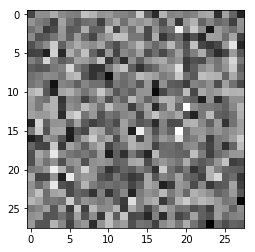

In [231]:
plt.imshow(K.eval(generated_image).reshape(28,28), cmap='gray')

In [0]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam)
    return discriminator

In [0]:
discriminator = create_discriminator()
decision = discriminator(generated_image)

In [234]:
K.eval(decision)

array([[0.5219115]], dtype=float32)

In [0]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

In [0]:
gan = create_gan(d,g)

In [245]:
gan.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 100)               0         
_________________________________________________________________
sequential_35 (Sequential)   (None, 784)               1486352   
_________________________________________________________________
sequential_34 (Sequential)   (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [0]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()

In [0]:
import numpy as np
def training(epochs=1, batch_size=128):
  
    # Load the data from mnist dataset.
    X_train, y_train, X_test, y_test = load_data()
    
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in range(batch_size):
            #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # We need to create batches of data that contain fake images from 
            # Generator and real images from the MNIST dataset that 
            # we will feed to Discriminator
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of real and fake data 
            X = np.concatenate([image_batch, generated_images])
            
            # We create a target variable for the real and fake images.
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            # We now pre-train the Discriminator on some fake and real data before starting the GAN. 
            # This helps to check if our compiled models run fine on our real data as well as the noised data.
            
            # Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            # Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            # We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
       
        plot_generated_images(e, generator)
        
#         # For every 20 epochs, we plot the generated images
#         if e == 1 or e % 20 == 0:
#             plot_generated_images(e, generator)


In [0]:
training(400,128)

## Ex: Functional API

In [0]:
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [262]:
from keras.layers import Input, Dense, Conv2D,MaxPooling2D,Flatten
from keras.models import Model

from keras.layers.merge import concatenate

# input layer

inputs = Input((28,28,1))

# first feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)

# second feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu')(inputs)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)

# merge feature extractors
merge = concatenate([flat1, flat2])

# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)

# prediction output
output = Dense(10,activation='softmax')(hidden1)
model = Model(inputs,output)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,batch_size=100)

loss,accuracy = model.evaluate(X_test,y_test)
print("Accuracy ",accuracy)

# summarize layers
#print(model.summary())


Epoch 1/2
60000/60000 [==============================] - 81s 1ms/step - loss: 0.3374 - acc: 0.8995
Epoch 2/2
10000/10000 [==============================] - 10s 986us/step
Accuracy  0.9784
